In [2]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('../dataset_with_has_delay.csv')

In [4]:
X = df.drop(columns=['has_delay', 'Min Delay', 'Min Gap', 'Incident'])
y = df['has_delay']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [6]:
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [7]:
print("Distribución de clases después de SMOTE:")
print(pd.Series(y_sm).value_counts())

Distribución de clases después de SMOTE:
has_delay
0    6170
1    6170
Name: count, dtype: int64


Distribución de clases (%):
has_delay
0    50.0
1    50.0
Name: proportion, dtype: float64


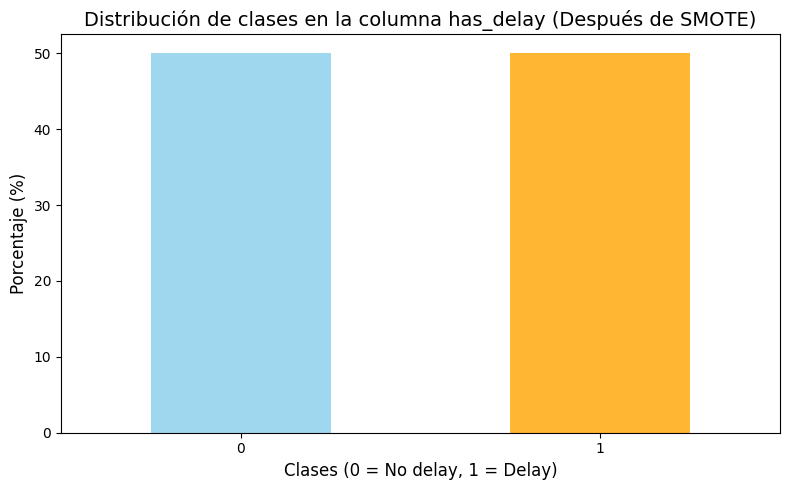

In [8]:
balanced_class_distribution = pd.Series(y_sm).value_counts(normalize=True) * 100
print("Distribución de clases (%):")
print(balanced_class_distribution)

plt.figure(figsize=(8, 5))
balanced_class_distribution.plot(kind='bar', color=['skyblue', 'orange'], alpha=0.8)
plt.title('Distribución de clases en la columna has_delay (Después de SMOTE)', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xlabel('Clases (0 = No delay, 1 = Delay)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [9]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42, stratify=y_sm)

In [10]:
model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [11]:
y_pred_smote = model_smote.predict(X_test_smote)

In [12]:
print("Confusion Matrix:")
print(confusion_matrix(y_test_smote, y_pred_smote))

Confusion Matrix:
[[1634  217]
 [ 371 1480]]


In [13]:
print("\nClassification Report:")
print(classification_report(y_test_smote, y_pred_smote))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1851
           1       0.87      0.80      0.83      1851

    accuracy                           0.84      3702
   macro avg       0.84      0.84      0.84      3702
weighted avg       0.84      0.84      0.84      3702



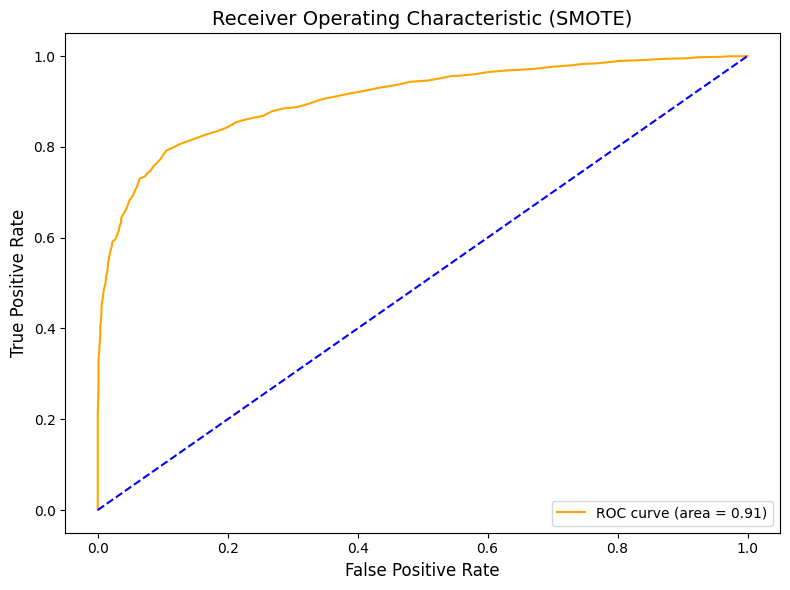

In [14]:
y_proba_smote = model_smote.predict_proba(X_test_smote)[:, 1]
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test_smote, y_proba_smote)
roc_auc_smote = auc(fpr_smote, tpr_smote)

plt.figure(figsize=(8, 6))
plt.plot(fpr_smote, tpr_smote, color='orange', label=f'ROC curve (area = {roc_auc_smote:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.title('Receiver Operating Characteristic (SMOTE)', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

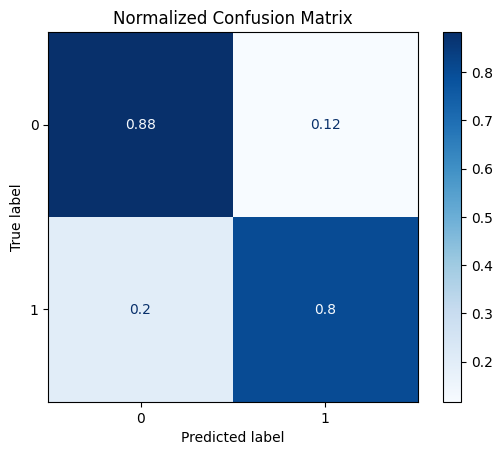

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model_smote, X_test_smote, y_test_smote, normalize='true', cmap='Blues')
plt.title('Normalized Confusion Matrix')
plt.show()

In [16]:
import joblib
joblib.dump(model_smote, 'models/classifier.pkl')
print("Model dumped!")

Model dumped!


([<matplotlib.axis.YTick at 0x1679c9ca0>,
 [Text(0, 0, 'Year'),
  Text(0, 1, 'Bound_B'),
  Text(0, 2, 'Bound_N'),
  Text(0, 3, 'Month'),
  Text(0, 4, 'Bound_S'),
  Text(0, 5, 'Bound_W'),
  Text(0, 6, 'Bound_E'),
  Text(0, 7, 'Week'),
  Text(0, 8, 'Day_of_Month'),
  Text(0, 9, 'Hour'),
  Text(0, 10, 'Minute'),
  Text(0, 11, 'Line'),
  Text(0, 12, 'Location'),
  Text(0, 13, 'Vehicle')])

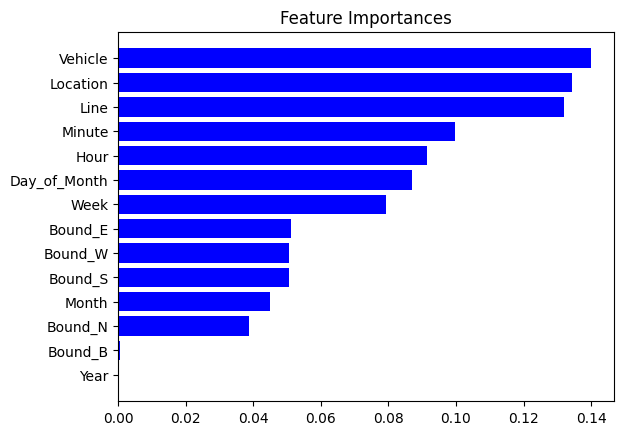

In [22]:
import matplotlib.pyplot as plt
feature_importances = model_smote.feature_importances_
features = X.columns
indices = feature_importances.argsort()
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')

plt.yticks(range(len(indices)), [features[i] for i in indices])